Optimal K value is: 5

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



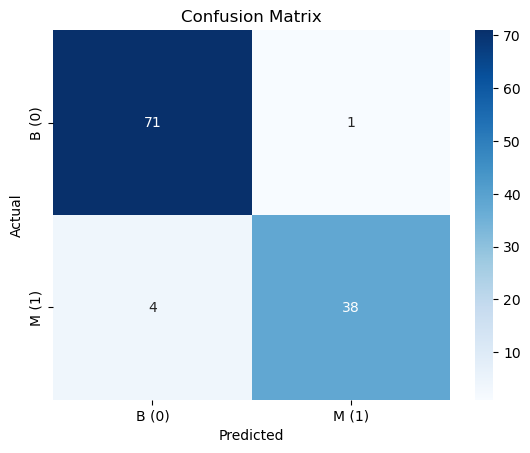


The KNN model and the StandardScaler have been successfully saved to 'knn_model.pkl' and 'scaler.pkl'.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

# --- Step 1: Data Loading and Preprocessing ---
# Load the dataset
df = pd.read_csv('data.csv')

# Drop the 'id' and 'Unnamed: 32' columns, as they are not needed for the model
df = df.drop(columns=['id', 'Unnamed: 32'])

# Encode the target variable 'diagnosis' from 'M' and 'B' to 1 and 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features (X) and the target variable (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling: scale the data for the KNN algorithm
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Step 2: Model Training and Optimization ---
# Find the optimal number of neighbors (k) for the KNN model
neighbors = np.arange(1, 20)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

# Find the optimal k based on the highest test accuracy
optimal_k = neighbors[np.argmax(test_accuracy)]
print(f"Optimal K value is: {optimal_k}")

# Train the final KNN model with the optimal k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

# --- Step 3: Model Evaluation and Visualization ---
# Make predictions on the test set
y_pred = knn_optimal.predict(X_test_scaled)

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['B (0)', 'M (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['B (0)', 'M (1)'])
plt.savefig('confusion_matrix.png')
plt.show()

# --- Step 4: Save the Model and Scaler ---
# Save the trained KNN model to a .pkl file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_optimal, file)

# Save the scaler object to a .pkl file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("\nThe KNN model and the StandardScaler have been successfully saved to 'knn_model.pkl' and 'scaler.pkl'.")